# Table of Contents
 <p>

In [1]:
%matplotlib inline
%load_ext version_information

# Standard Library
import bisect, datetime, pathlib, pickle, sys, time

# Third Party Libraries
from IPython.display import FileLink
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm

# Local Definitions
plt.rcParams["font.size"] = 14
fig_dir = pathlib.Path("../figs/")
fig_prefix = "171130-dko-"

%version_information matplotlib,numpy,pandas

Software versions
Python 3.6.3 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.1.0
OS Darwin 16.7.0 x86_64 i386 64bit
matplotlib 2.1.0
numpy 1.13.3
pandas 0.21.0
Thu Nov 30 15:19:59 2017 MST

In [15]:
raw_data = pd.read_csv("GISS_Surface_Temps.csv",skiprows=1)
raw_data.head()

,Year,Anomaly
0,1880.04,-2.71
1,1880.13,-2.34
2,1880.21,-1.58
3,1880.29,-0.67
4,1880.38,0.35


In [12]:
years = pd.Series([int(y) for y in raw_data.Year])
months = pd.Series([y-int(y) for y in raw_data.Year])

{0.03999999999996362,
 0.13000000000010914,
 0.21000000000003638,
 0.2899999999999636,
 0.38000000000010914,
 0.4600000000000364,
 0.5399999999999636,
 0.6300000000001091,
 0.7100000000000364,
 0.7899999999999636,
 0.8800000000001091,
 0.9600000000000364}

In [20]:
new_data = np.zeros((12,len(set(years))))
for k in range(len(years)):
    i = k%12
    j = k//12
    new_data[i,j] = raw_data.Anomaly[k]
        

[Text(0,0,'Jan'), Text(0,0,'Apr'), Text(0,0,'Jul'), Text(0,0,'Oct')]

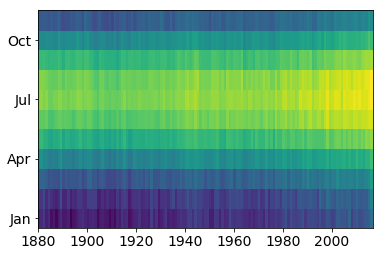

In [48]:
y = [y for y in set(years)]
m = range(12)
plt.pcolormesh(y,m,new_data)
ax = plt.gca()
ax.set_yticks([0.5,3.5,6.5,9.5])
ax.set_yticklabels(["Jan","Apr","Jul","Oct"])

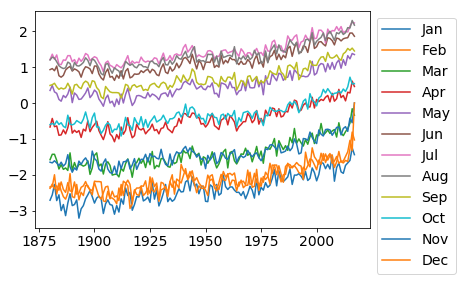

In [47]:
plt.plot(y,new_data.T)
plt.legend(["Jan","Feb","Mar","Apr",'May',"Jun","Jul","Aug","Sep",'Oct','Nov','Dec'],bbox_to_anchor=(1,1));

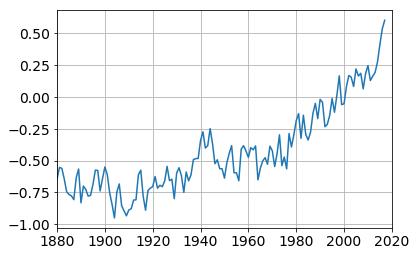

In [51]:
plt.plot(y,new_data.mean(axis=0))
plt.xlim((1880,2020))
plt.grid()